In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score

In [9]:
data = np.genfromtxt('RegData.csv',delimiter=',')

In [10]:
x=data[ : , 0]

In [11]:
y= data[: , 1 ]

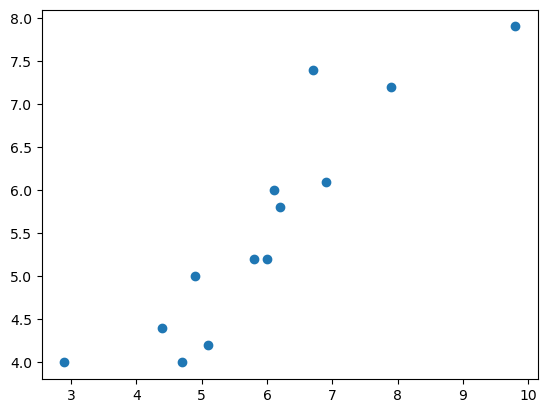

In [12]:
plt.scatter(x,y)

### 1:Intializing parameters 

In [17]:
theta_0 = 0
theta_1=0
alpha=1

### 2:Prediction the output

In [18]:
def h( x ):
    return theta_0 + theta_1 * x

In [21]:
y_predict=h(x)
print(y_predict)
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


### 3: calculating the error 

In [22]:
def mse(y,y_pred):
    error=y_pred-y
    mse = np.sum(error**2) / (2 * len(y))
    return error,mse

In [24]:
error , j =mse(y,y_predict)
print(error)
print(j)

[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]
16.305384479692318


### 4:defining the gradients

In [26]:
def calc_gradient(x , error_vector):
    m=len(x)
    gradient_theta_0 = (1 / m) * np.sum(error_vector)
    gradient_theta_1 = (1 / m) * np.sum(error_vector * x)
    return gradient_theta_0 , gradient_theta_1
    

In [28]:
d_theta0 , d_theta1 = calc_gradient(x,error)
print(d_theta0)
print(d_theta1)

-5.569230739769231
-35.043846043215375


### 5:updating parameters

In [29]:
def update(theta , d_theta , alpha):
    return theta - alpha * d_theta

In [32]:
theta_0_new= update(theta_0,d_theta0,.0001)
theta_0_new

0.0005569230739769231

### 6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.

In [39]:
def LR(x , theta0 , theta1 , y ,alpha, convergence_threshold=0.1 , max_iters=300):
    for i in range(max_iters):
        y_predict= theta0 +theta1 * x 
        
        error_vector= y_predict - y
        mse = np.sum(error_vector**2) / (2 * len(y))
        
        m=len(y)
        gradient_theta_0 = (1 / m) * np.sum(error_vector)
        gradient_theta_1 = (1 / m) * np.sum(error_vector * x)
   
        gradient_norm = np.linalg.norm([gradient_theta_0, gradient_theta_1])
        
        if gradient_norm < convergence_threshold :
            print("Converged")
            print("************training report*************\n")
            print("converged after ", i, "iterations\n")
            print("ioptimum theta 0 : \n ",theta0)
            print("ioptimum theta 1 :\n ",theta1)
            break
        theta0 = theta0 - alpha * gradient_theta_0
        theta1 = theta1 - alpha * gradient_theta_1 
        
        
        return theta0 , theta1
    
    
    
        
    

In [40]:
LR(x,0,0,y,0.01,0.1,1000)

(0.05569230739769231, 0.35043846043215376)